In [1]:
import os
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

In [2]:
cell_types = os.listdir('../ml_input/')
for c in cell_types: 
    print(c)

L23_IT_CTX_Glut
DG_Glut
CA1-ProS_Glut
Astro-TE_NN
Oligo_NN
L6_IT_CTX_Glut
L5_ET_CTX_Glut
CA3_Glut
Pvalb_Gaba
L6_CT_CTX_Glut
OPC_NN


In [3]:
ct = "CA1-ProS_Glut"
datapath = Path(f"/gale/ddn/aging/aklein/240903_aging_mice/aging_gene_prediction/aging_gene_prediction/ak_workspace/data/v1/{ct}/")

In [4]:
FEATURES = ['meta', 'atac', 'loops', 'DAR', 'DMR', 'mcg_genebody', 'mch_genebody', 'enhancer_DMR', 'enhancer_peak']

In [5]:
df_rna = pd.read_csv(f'{datapath}/{ct}.rna.csv', index_col=0)
gene_order = df_rna.index

In [6]:
def label_missing(rects, ax): 
    for rect in rects: 
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.3f}%', ha='center', va='bottom',)

In [7]:
with PdfPages(f"{datapath}/missing_plot.pdf") as pdf:
    for _feat in FEATURES: 
        inpath = Path(f'{datapath}/{ct}.{_feat}.csv')
        if inpath.exists(): 
            df_feat = pd.read_csv(inpath, index_col=0).reindex(gene_order)
    
            missing = pd.isna(df_feat).sum() / df_feat.shape[0] * 100
    
            num_feats = df_feat.shape[1]
            num_cols = min(5, int(num_feats / 10) + 1)
            num_rows = int(num_feats / 50) + 1
    
            # print(num_cols, num_rows)
            fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 10, num_rows * 8), constrained_layout=True)
            if num_cols  * num_rows == 1:
                sns.barplot(missing, color='teal', ax=axes)
                label_missing(axes.patches, axes)
                axes.set_ylim((0, 100))
                axes.set_ylabel("Percent Missing")
                axes.set_xlabel("Feature")
                for label in axes.get_xticklabels(): 
                        label.set_rotation(45)
                        label.set_ha('right')
                plt.suptitle(f"Missing Values in {_feat}")
                # plt.show()
                pdf.savefig(fig)
                plt.close()
                
            else: 
                for i, idx in enumerate(range(0, num_feats, 10)): 
                    ax = axes.flatten()[i]
                    
                    missing_curr = missing[idx:idx+10]
                    sns.barplot(missing_curr, color='teal', ax=ax)
                    label_missing(ax.patches, ax)
                
                    ax.set_ylim((0, 100))
                    ax.set_ylabel("Percent Missing")
                    ax.set_xlabel("Feature")
                    for label in ax.get_xticklabels(): 
                        label.set_rotation(45)
                        label.set_ha('right')
                        
                plt.suptitle(f"Missing Values in {_feat}")
                # plt.show()
                pdf.savefig(fig)
                plt.close()
            
            # display(df_feat)
        else: 
            print(f"{_feat} does not exist for {ct}")

In [8]:
with PdfPages(f"{datapath}/distribution_plot.pdf") as pdf:
    for _feat in FEATURES: 
        inpath = Path(f'{datapath}/{ct}.{_feat}.csv')
        if inpath.exists(): 
            df_feat = pd.read_csv(inpath, index_col=0).reindex(gene_order)
        
            num_feats = df_feat.shape[1]
            num_cols = min(5, int(num_feats) + 1)
            num_rows = int(num_feats / 5) + 1
    
            # print(num_cols, num_rows)
            fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 10, num_rows * 8), constrained_layout=True)
            for i in range(num_feats): 
                ax = axes.flatten()[i]
                feat = pd.DataFrame(df_feat.iloc[:, i])
                feat['deg'] = df_rna['DEG']
                cc = feat.columns[0]
                try: 
                    sns.histplot(feat, x=cc, hue='deg', stat='density', element='step', palette='bright', ax=ax)        
                except: 
                    print(f"{cc} in {_feat} does not plot")
                    
            plt.suptitle(f"Feature Distributions Values in {_feat}")
            # plt.show()
            pdf.savefig(fig)
            plt.close()
            
        else: 
            print(f"{_feat} does not exist for {ct}")
        # break

9mo.2mo.contact.log_ratio.skew.10kb-20kb in enhancer_DMR does not plot


In [9]:
feat['logfc'] = df_rna['avg_log2FC']

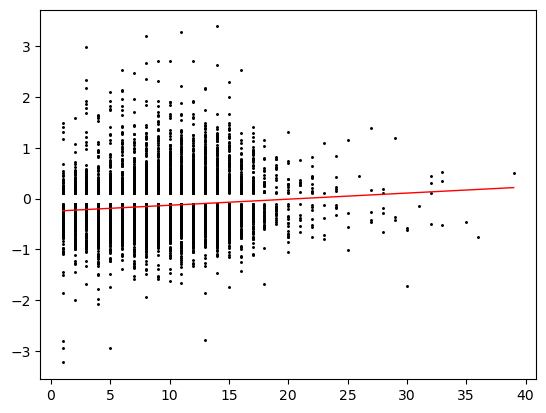

In [10]:
fig, ax = plt.subplots()
x = feat[~feat[cc].isna()][cc].values
y = feat[~feat[cc].isna()]['logfc'].values
ax.scatter(x, y, s=5, marker='.', c='k') 

b, a = np.polyfit(x, y, deg=1)
xseq = np.linspace(min(x), max(x), 100)
ax.plot(xseq, a+b*xseq, color='r', lw=1)

plt.show()

In [196]:
with PdfPages(f"{datapath}/correlation_plot.pdf") as pdf:
    for _feat in FEATURES: 
        inpath = Path(f'{datapath}/{ct}.{_feat}.csv')
        if inpath.exists(): 
            df_feat = pd.read_csv(inpath, index_col=0).reindex(gene_order)
    
            missing = pd.isna(df_feat).sum() / df_feat.shape[0] * 100
    
            num_feats = df_feat.shape[1]
            num_cols = min(5, int(num_feats) + 1)
            num_rows = int(num_feats / 5) + 1
    
            # print(num_cols, num_rows)
            fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 10, num_rows * 8), constrained_layout=True)
            for i in range(num_feats): 
                ax = axes.flatten()[i]
                feat = pd.DataFrame(df_feat.iloc[:, i])
                feat['logfc'] = df_rna['avg_log2FC']
                cc = feat.columns[0]
    
                try: 
                    x = feat[~feat[cc].isna()][cc].values
                    y = feat[~feat[cc].isna()]['logfc'].values
                    ax.scatter(x, y, s=10, marker='.', c='k') 
                    b, a = np.polyfit(x, y, deg=1)
                    xseq = np.linspace(min(x), max(x), 100)
                    ax.plot(xseq, a+b*xseq, color='r', lw=2)
                    ax.set_xlabel(f"{cc}")
                    ax.set_ylabel(f"avg_log2FC")
                    ax.set_title(f"Correlation for {cc}")
                    
                except: 
                    print(f"{cc} in {_feat} is non integer / some other problem arose")
                    
            plt.suptitle(f"Feature Correlation Values in {_feat}")
            # plt.show()
            pdf.savefig(fig)
            plt.close()
            
        else: 
            print(f"{_feat} does not exist for {ct}")
        # break

gene_type in meta is non integer / some other problem arose
gene_chr in meta is non integer / some other problem arose


/gale/ddn/aging/aklein/240903_aging_mice/aging_gene_prediction/aging_gene_prediction/ak_workspace/data/generate_features/ipykernel_97545/4183545282.py:25: RankWarning: Polyfit may be poorly conditioned
  b, a = np.polyfit(x, y, deg=1)
/gale/ddn/aging/aklein/240903_aging_mice/aging_gene_prediction/aging_gene_prediction/ak_workspace/data/generate_features/ipykernel_97545/4183545282.py:25: RankWarning: Polyfit may be poorly conditioned
  b, a = np.polyfit(x, y, deg=1)
/gale/ddn/aging/aklein/240903_aging_mice/aging_gene_prediction/aging_gene_prediction/ak_workspace/data/generate_features/ipykernel_97545/4183545282.py:25: RankWarning: Polyfit may be poorly conditioned
  b, a = np.polyfit(x, y, deg=1)
/gale/ddn/aging/aklein/240903_aging_mice/aging_gene_prediction/aging_gene_prediction/ak_workspace/data/generate_features/ipykernel_97545/4183545282.py:25: RankWarning: Polyfit may be poorly conditioned
  b, a = np.polyfit(x, y, deg=1)
/gale/netapp/home2/aklein/miniconda3/envs/agp/lib/python3.10

9mo.2mo.activity.log_ratio.skew.1Mb-5Mb in enhancer_DMR is non integer / some other problem arose
18mo.9mo.activity.log_ratio.skew.1Mb-5Mb in enhancer_DMR is non integer / some other problem arose
9mo.2mo.contact.log_ratio.std.1Mb-5Mb in enhancer_DMR is non integer / some other problem arose

Intel MKL ERROR: Parameter 4 was incorrect on entry to DGELSD.
9mo.2mo.contact.log_ratio.skew.1Mb-5Mb in enhancer_DMR is non integer / some other problem arose
18mo.9mo.contact.log_ratio.std.1Mb-5Mb in enhancer_DMR is non integer / some other problem arose

Intel MKL ERROR: Parameter 4 was incorrect on entry to DGELSD.
18mo.9mo.contact.log_ratio.skew.1Mb-5Mb in enhancer_DMR is non integer / some other problem arose
9mo.2mo.abc_score.log_ratio.skew.1Mb-5Mb in enhancer_DMR is non integer / some other problem arose
18mo.9mo.abc_score.log_ratio.skew.1Mb-5Mb in enhancer_DMR is non integer / some other problem arose
